In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Ronald C\Downloads\movies.csv')



In [2]:
# Let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df = df.dropna()


In [5]:
# Checking if there are missing values now

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing data type on columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [9]:
# Creating correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [12]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [13]:
pd.set_option('display.max_rows', None)

In [15]:
# Drop any duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)


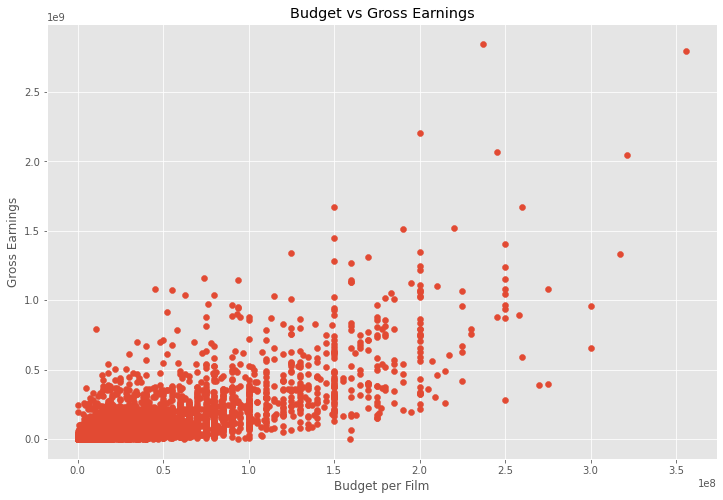

In [17]:
# Scatted plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget per Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

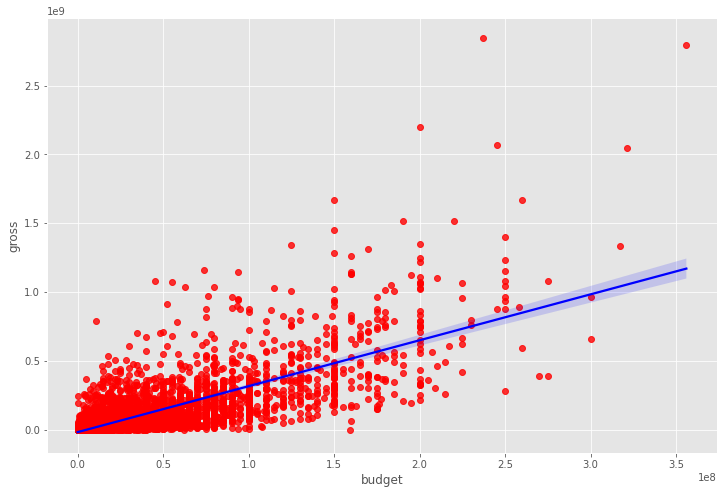

In [18]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

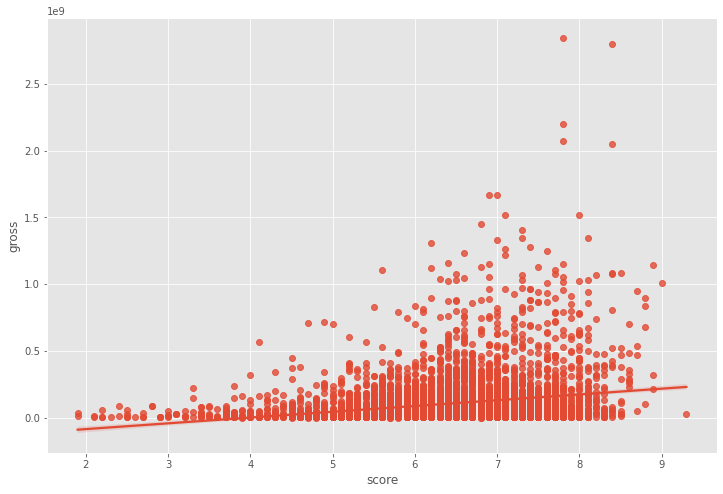

In [19]:
sns.regplot(x="score", y="gross", data=df)

In [20]:
# let's start looking at correlation

df.corr()

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


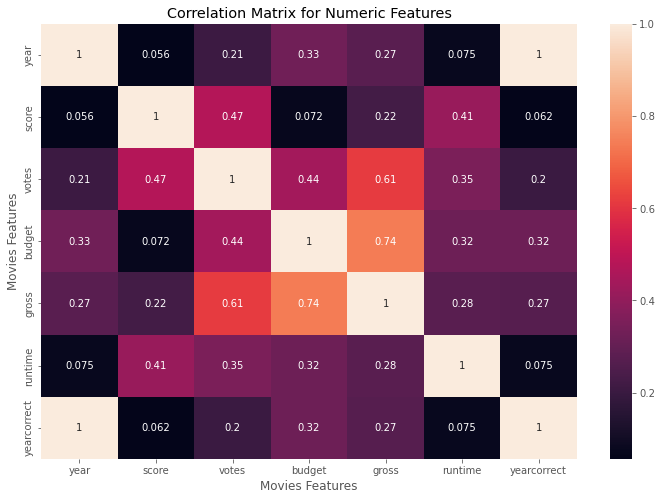

In [21]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')

plt.show()

In [22]:
# Look at Company

#df_numerized = df

#for col_name in df_numerized.columns:
#    if(df_numerized[col_name].dtype == 'object'):
#        df_numerized[col_name] = df_numerized[col_name].astype('category')
#        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
#df_numerized



# Using factorize - this assigns a random numeric value for each unique categorical value
df.apply(lambda x: x.factorize()[0]).corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.242124


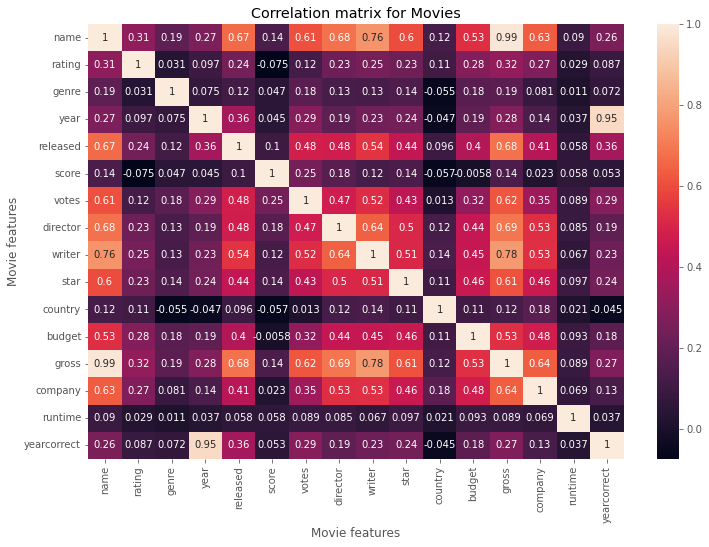

In [23]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating      0.314800
      genre       0.186668
      year        0.267282
      released    0.667785
dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs.head()

score    rating    -0.075109
rating   score     -0.075109
score    country   -0.057087
country  score     -0.057087
genre    country   -0.055109
dtype: float64

In [28]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         director       0.504992
director     star           0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
votes        writer         0.522918
name         budget         0.526690
budget       name           0.526690
director     company        0.528071
company      director       0.528071
writer       company        0.532013
company      writer         0.532013
budget       gross          0.532810
gross        budget         0.532810
released     writer         0.541155
writer       released       0.541155
name         star           0.599410
star         name           0.599410
votes        name           0.608411
name         votes          0.608411
gross        star           0.612142
star         gross          0.612142
gross        votes          0.620450
votes        gross          0.620450
company      name           0.631721
name         company        0.631721
company      gross          0.637241
g

In [29]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

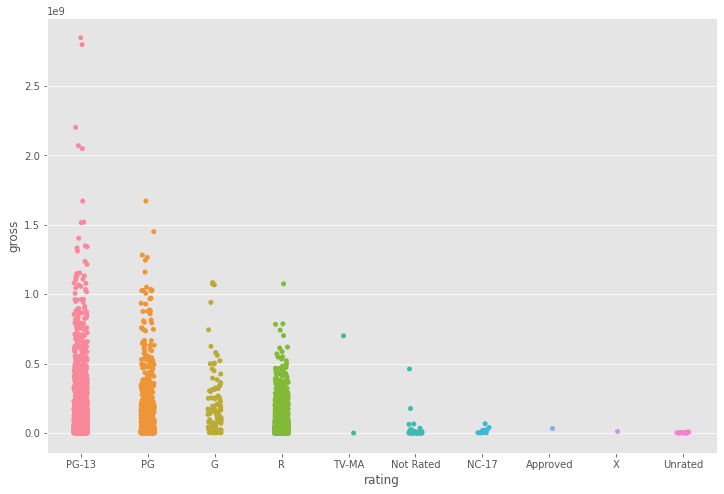

In [30]:
sns.stripplot(x="rating", y="gross", data=df)